In [1]:
#Import bsic Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
#Create the engine to pull data 
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [8]:
#Declare a Base 
Base = automap_base()

In [9]:
#Using Base, refelct the database 
Base.prepare(engine, reflect=True)

In [10]:
#Get the keys from the mapped data
Base.classes.keys()

['measurement', 'station']

In [14]:
#Set variables to the classes
measure = Base.classes.measurement
station = Base.classes.station

In [15]:
# Create a session
session = Session(engine)

In [16]:
# Display the measure's columns and data in dictionary format
first_row = session.query(measure).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d604db09c8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1}

In [17]:
# Display the station's columns and data in dictionary format
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d604dc7d08>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [49]:
#Retrieve the last 12 months of precipitation 
#Find the last day in the data set 
last_day = session.query(measure.date).order_by(measure.date.desc()).first()

print(f"The last day in the data set is {last_day[0]}.")

#Get the data for one year ago
last_year_day = (dt.datetime.strptime(last_day[0],'%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')

print(f"The last day in in the data set from 1 year ago is {last_year_day}.")

The last day in the data set is 2017-08-23.
The last day in in the data set from 1 year ago is 2016-08-23.


In [55]:
# Perform a query to retrieve the data and precipitation scores
measure_columns = (measure.date, measure.prcp)

yearly_data = session.query(*measure_columns).filter(measure.date >= last_year_day).all()

yearly_data[:10]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [58]:
#Save the query results as a Pandas DataFrame and set the index to the date column
yearly_data_df = pd.DataFrame(yearly_data)

yearly_data_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [64]:
#Set index to data column 
yearly_data_df.set_index('date',inplace = True)
yearly_data_df = yearly_data_df.sort_index()

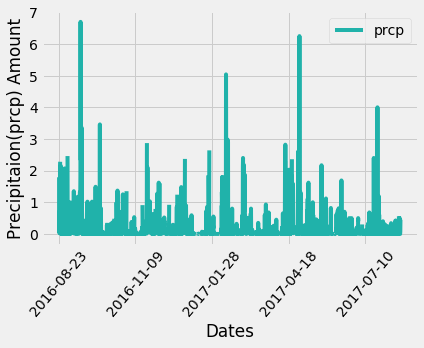

In [72]:
#Plot the data 
prcp = yearly_data_df.plot(rot= 50, color = "lightseagreen")
prcp

plt.xlabel("Dates")
plt.ylabel("Precipitaion(prcp) Amount")
plt.show()

In [73]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearly_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [76]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(station).count()

print(f"There are {station_count} stations in the data set.")

There are 9 stations in the data set.


In [90]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_data =  session.query(measure.station, func.count(measure.station)).\
                group_by(measure.station).order_by(func.count(measure.station).desc()).all()
station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [109]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(func.min(measure.tobs))
highest_temp = session.query(func.max(measure.tobs))
avg_temp = session.query(func.avg(measure.tobs)).filter(measure.station)

print(f"The lowest temperture recorded was {lowest_temp.all()}.")
print(f"The highest temperture recorded was {highest_temp.all()}.")
print(f"The average temperture recorded was {avg_temp.all()}.")


The lowest temperture recorded was [(53.0,)].
The highest temperture recorded was [(87.0,)].
The average temperture recorded was [(73.09795396419437,)].


In [115]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
high_temp = session.query(measure.date, measure.tobs).filter(measure.station =="USC00519281").\
            filter(measure.date >last_year_day).all()

high_temp[:10]

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0)]

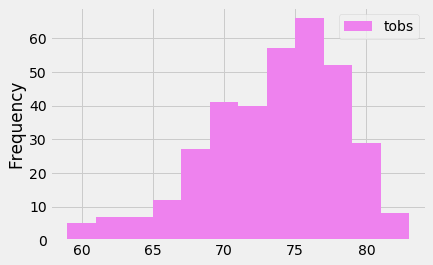

In [122]:
#Plot the results as a histogram
high_temp_df = pd.DataFrame(high_temp)
high_temp_df.plot(kind = "hist", bins=12, color = "violet")
